# Plot for Scalable Gabriel Experiments With DutyCycle + IMU suppression

Requires python3 with seaborn plotting package.
This was run on Sandstorm with conda env "plot" for the paper.

In [18]:
from __future__ import print_function
import glob
import matplotlib
rc_fonts = {
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
import pickle

In [22]:
pretty_color = {
        'Original Gabriel': '#FFA500',
        'Scalable Gabriel': '#000080'}

==============app: lego=============


<IPython.core.display.Javascript object>


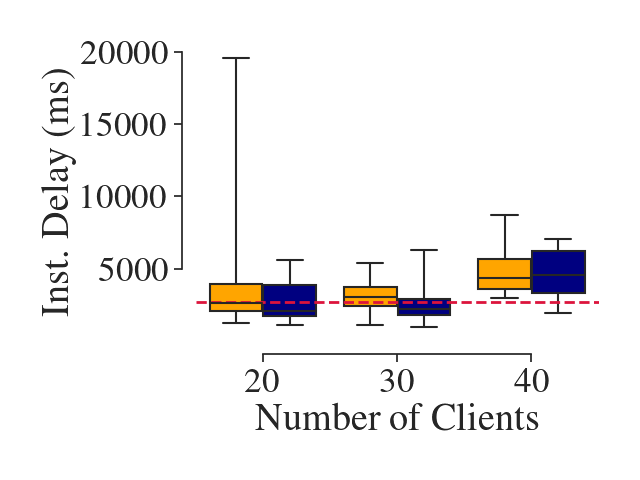

==============app: pingpong=============


<IPython.core.display.Javascript object>


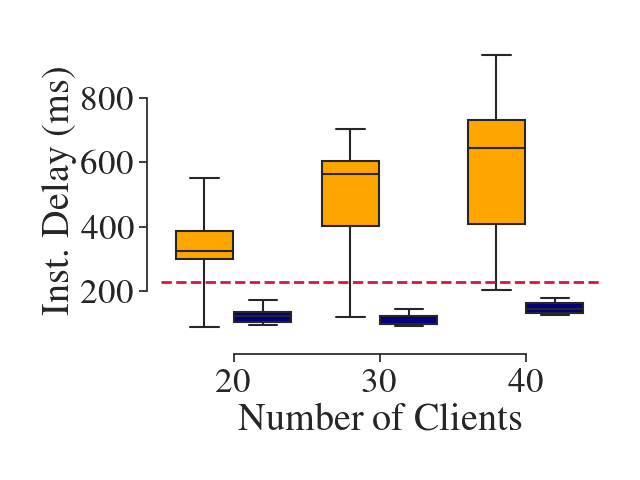

==============app: pool=============


<IPython.core.display.Javascript object>


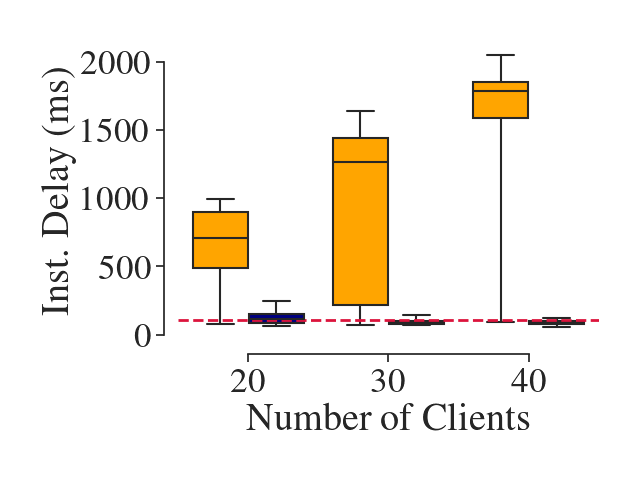

==============app: face=============


<IPython.core.display.Javascript object>


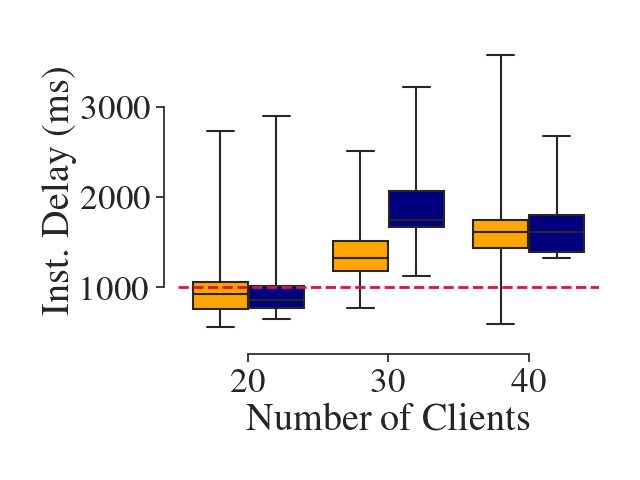

==============app: ikea=============


<IPython.core.display.Javascript object>


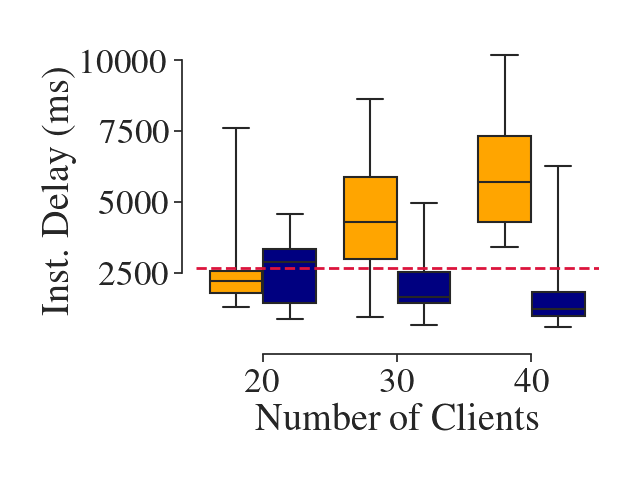

In [23]:
%matplotlib notebook
with open('sec6-inst-latency.pkl', 'rb') as f:
    data = pickle.load(f)
apps = ['lego', 'pingpong', 'pool', 'face', 'ikea']
loose_bound = {
    'lego': 2700, 
    'pingpong': 230, 
    'pool': 105, 
    'face': 1000,
    'ikea': 2700,
}
baseline_exp_format = 'sec6-fppli{}-baseline'
ours_exp_format = 'sec6-fppli{}-cpushares'

import seaborn as sns
sns.set(style='ticks', font='Times New Roman', font_scale=2.3)

exps = [4, 6, 8]
for app in apps:
    print('==============app: {}============='.format(app))
    app_data = data[app]
    df = pd.DataFrame()
    cols = ['delay', 'exp_type', 'exp_name']
    plt.figure()
    for exp in exps:
        bn = baseline_exp_format.format(exp)
        on = ours_exp_format.format(exp)
        baseline_data = app_data[bn]
        ours_data = app_data[on]
        bdf = pd.DataFrame(zip(baseline_data, ['Original Gabriel']*len(baseline_data), [exp * len(apps)] *len(baseline_data)), columns=cols)
        odf = pd.DataFrame(zip(ours_data, ['Scalable Gabriel']*len(baseline_data),  [exp * len(apps)] *len(baseline_data)), columns =cols)
        df = df.append(bdf)
        df = df.append(odf)
    ax = sns.boxplot(x="exp_name", y="delay",
            hue="exp_type", data=df, whis=10, showfliers=False, palette=pretty_color, saturation=1)
#     from itertools import cycle
#     hatches = cycle(["", "/"])
#     for hatch, patch in zip(hatches, ax.artists):
#         patch.set_hatch(hatch)
    ax.set(xlabel='Number of Clients', ylabel='Inst. Delay (ms)')
    plt.axhline(y=loose_bound[app], color='crimson', linestyle='--', linewidth=2, label='Latency Bound')
    sns.despine(offset=10, trim=True)
    ax.get_legend().remove()
    plt.tight_layout()
    plt.savefig('figs/fig-sec6-latency-{}.pdf'.format(app), bbox_inches='tight')

<IPython.core.display.Javascript object>


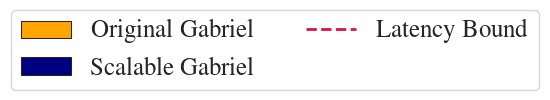

In [21]:
%matplotlib notebook

plt.figure(figsize = (5.5,1))
legs, labels = ax.get_legend_handles_labels()
legs.insert(2, legs.pop(0))
labels.insert(2, labels.pop(0))
plt.figlegend(legs, labels, loc = 'center', ncol=2, prop={'weight': 1000, 'size':18})
plt.tight_layout()
plt.savefig('figs/fig-sec6-latency-legend.pdf', bbox_inches=0)
plt.show()